__собираем статистики по объявлениям о аренде квартир__

_Evgeny S. Borisov <parser@mechanoid.su>_

In [1]:
!date

Вт 15 окт 2024 11:54:49 MSK


# загружаем данные

In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd

pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
df = pd.read_pickle('data/2024/df_flat-arenda.pkl')
df['dt'] = df['ts'].dt.date
display( len(df) )
cols = ['title','address','latitude','longitude','priceM','dt']
display( df.sample(3)[cols] )

888

,title,address,latitude,longitude,priceM,dt
444,"2-к. квартира, 60 м², 6/10 эт.","севастополь,проспект октябрьской революции,48 к1",44.588507,33.4614,0.06,2024-10-15
623,"3-к. квартира, 67 м², 5/5 эт.","севастополь,кача,улица авиаторов,24",44.776352,33.54524,0.03,2024-10-15
72,"4-к. квартира, 100 м², 2/2 эт.","севастополь,фиолентовское шоссе ,6",44.578588,33.475,0.01,2024-10-15


In [4]:
df['priceK'] = df['price']/1_000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   url            888 non-null    object        
 1   place          888 non-null    object        
 2   title          888 non-null    object        
 3   price          888 non-null    int64         
 4   address        888 non-null    object        
 5   description    888 non-null    object        
 6   ts             888 non-null    datetime64[us]
 7   nrooms         888 non-null    int64         
 8   floor          888 non-null    int64         
 9   nfloors        888 non-null    int64         
 10  area           888 non-null    float64       
 11  is_studio      888 non-null    bool          
 12  is_apartment   888 non-null    bool          
 13  is_part        888 non-null    bool          
 14  is_auction     888 non-null    bool          
 15  is_openspace   888 non-

In [6]:
# только авито
display(len(df))
df = df[ ~df['url'].str.match(r'.*cian\.ru.*') ].reset_index(drop=True)
display(len(df)) 

888

888

In [7]:
# cols = ['title','address','latitude','longitude','priceM','dt','place','url']
# df[ (df['place']=='sevastopol') & (df['address'].str.match(r'.*Судак.*')) ][cols]

---

In [8]:
# df[ df['ts'].dt.date > pd.to_datetime('2024-01-01').date() ]

In [9]:
# df_ = pd.read_pickle('data/2023/data_flat.pkl').rename(columns={'adr':'address'})
# display( len(df_) )
# df_ = (
#         df_
#         .dropna(subset=['dt','url'])
#         .drop_duplicates(['dt','url'])
#         .drop(columns=['adr_orig','obj_name','avito_page','cian_page'])
#     )
# display( len(df_) )
# cols = ['title','address','latitude','longitude','priceM','dt','url']
# display( df_.sample(3)[cols] )

In [10]:
def address_filter(df):
    #           46.319437, 33.911048
    #
    # 45.402617, 32.455625 |  45.545301, 36.684702
    #
    #          44.320887, 33.917013

    df['latitude'] = pd.to_numeric( df['latitude'], errors='coerce' )
    df['longitude'] = pd.to_numeric( df['longitude'], errors='coerce' )

    df = df.query('(32.4<longitude<36.7) & (44.3<latitude<46.4)') 

#     df.loc[ df['url']=='https://avito.ru/2322251740', ['latitude','longitude']] = None

#     df.loc[ df['address']=='Севастополь,Чёрное море', ['latitude','longitude'] ] = None
#     df.loc[ df['address'].str.lower().str.match('чёрное море'), ['latitude','longitude'] ] = None 

#     df.loc[ df['address']=='квартал Старый Город', 'place'] = 'turkie'
#     df.loc[ df['address'].str.lower().str.match('анталья'), 'place' ] = 'turkie' 

#     df.loc[ df['address'].str.lower().str.match(r'.*бахчисарай.*'), 'place' ] = 'bahchisaray'
#     df.loc[ df['address'].str.lower().str.match(r'.*севастополь,.*'), 'place' ] = 'sevastopol'

#     df.loc[ df['address'].str.lower().str.match(r'.*мысовское.*'), 'place' ] = 'kerch'
#     df.loc[ df['address'].str.lower().str.match(r'.*алушта.*'), 'place' ] = 'alushta'
#     df.loc[ df['address'].str.lower().str.match(r'.*гурзуф.*'), 'place' ] = 'gurzuf'

#     df.loc[ df['address'].str.lower().str.match(r'.*с.лучистое.*'), 'place' ] = 'alushta'
#     df.loc[ df['address'].str.lower().str.match(r'.*снт солнечная долина.*'), 'place' ] = 'sudak'
#     df.loc[ df['address'].str.lower().str.match(r'.*пгт.новоозёрное.*'), 'place' ] = 'evpatoria'

#     df.loc[ df['address'].str.lower().str.match(r'.*с.мирное.*'), 'place' ] = 'simferopol'
#     df.loc[ df['address'].str.lower().str.match(r'.*тсн аэрофлот.*'), 'place' ] = 'simferopol'

#     df.loc[ df['address'].str.lower().str.match(r'.*семисот.*'), 'place' ] = 'kerch'

#     df.loc[ df['address'].str.lower().str.match(r'.*ялта.*') , 'place' ] = 'yalta'
#     df.loc[ df['address'].str.lower().str.match(r'.*феодосия.*') , 'place' ] = 'feodosia'
#     df.loc[ df['address'].str.lower().str.match(r'.*окуневка.*') , 'place' ] = 'tarkhankut'
#     df.loc[ df['address'].str.lower().str.match(r'.*заветное.*') , 'place' ] = 'kerch'
#     df.loc[ df['address'].str.lower().str.match(r'.*евпатория.*') , 'place' ] = 'evpatoria'
#     df.loc[ df['address'].str.lower().str.match(r'.*симферопольский район.*'), 'place' ] = 'simferopol'

#    df.loc[ df['address'].str.lower().str.match(r'.*c.симферопольский район.*'), 'place' ] = 'simferopol'

    df.loc[ df['address'].str.lower().str.match(r'.*судак,село радостное.*'), 'place' ] = 'st.krym'
    df = df.dropna(subset=['latitude','longitude'])
    
    return df

In [11]:
display( len(df) )
df = address_filter(df)
# history_date = df_['dt'].max()
# df = pd.concat([df,df_])
display( len(df) )
# del df_

888

888

----

In [12]:
df['month'] = df['ts'].dt.to_period('M')
df['week'] = df['ts'].dt.to_period('W')

In [13]:
# display( len(df) )
# df = df.dropna(subset=['latitude','longitude'])
# display( len(df) )

----

In [14]:
# display(len(df))
# # выкидываем "ущербные" варианты 
# df = df.query('~(is_studio|is_apartment|is_part|is_auction|is_openspace|is_SNT|is_roof)&(nrooms>0)&(nrooms<4)')
# display(len(df))
# df = df.query('priceM>1.') # выкидываем предожения с аномально низкой ценой
# display(len(df))

In [15]:
gdf = gpd.GeoDataFrame( df, geometry = gpd.points_from_xy( df['longitude'], df['latitude']), crs='epsg:4326', )
# [['title','address','latitude','longitude','priceM']] 
display( gdf.sample(3)[cols])

,title,address,latitude,longitude,priceM,dt
114,"1-к. квартира, 32 м², 4/5 эт.","севастополь,улица хрусталёва,15а",44.58,33.52,0.03,2024-10-15
142,"4-к. квартира, 80 м², 3/5 эт.","севастополь,улица косарева,6",44.58,33.46,0.04,2024-10-15
384,"1-к. квартира, 43 м², 8/8 эт.","севастополь,улица горпищенко,139",44.58,33.58,0.03,2024-10-15


---

In [16]:
dt_max = df['dt'].max()
dt_min = df['dt'].min()
# display( dt_min,history_date,dt_max )
print( dt_min,' : ',dt_max )

2024-10-15  :  2024-10-15


In [17]:
# gdf_history = gdf.query(f'dt <= @history_date')
# gdf = gdf.query(f'dt > @history_date')

In [18]:
# display( len(gdf_history) )
display( len(gdf) )

888

In [19]:
display( len(gdf) )
gdf = (
    gdf
    .query("place in ('sevastopol','sudak')")
    # .drop_duplicates(['dt','url'])
    .drop_duplicates(['url','week'])
    .reset_index(drop=True)
)
display( len(gdf) )

888

888

In [20]:
# # display( gdf.columns )

# display( len(gdf) )
# gdf = gdf.drop_duplicates(['url','week'])
# display( len(gdf) )

In [21]:
# gdf.columns

In [22]:
# цена за квадратный метр (тыс.руб.)
# gdf['price_area_K'] = (gdf['price']/gdf['area'])/1_000

In [23]:
# gdf[ ~gdf['url'].str.match(r'.*cian\.ru.*') ] 

# общая статистика

In [24]:
# gdf[['title','address','priceM','geometry']].sample(1024).explore()

In [26]:
gdf.query('place=="sevastopol"')[['title','address','priceK','geometry']].sample(min(1024,len(gdf))).explore()

In [27]:
# gdf.query('place=="sudak"')[['title','address','priceM','geometry']].explore()

In [28]:
# gdf_last[ gdf_last['address'].str.match(r'.*долина роз.*') ][['title','address','priceM','geometry','url']].explore()

---

In [29]:
percentiles=[.01,.05,.1,.25,.5,.75,.9,.95]
stat = (
        gdf
        .groupby(['place','nrooms','week'])
#         .groupby(['place','nrooms','month'])
        ['priceK'].describe(percentiles=percentiles)
    )
    
display( stat )

count  mean   std   min    1%    5%  \
place      nrooms week                                                         
sevastopol 0      2024-10-14/2024-10-20 195.00 25.12 10.56  7.00 12.94 15.00   
           1      2024-10-14/2024-10-20 333.00 25.64  9.20  9.00 10.00 15.00   
           2      2024-10-14/2024-10-20 233.00 33.86 15.38 15.00 15.32 20.00   
           3      2024-10-14/2024-10-20 109.00 54.37 32.33  7.50 25.00 27.40   
           4      2024-10-14/2024-10-20  16.00 62.81 27.75  7.90 10.92 22.98   
           5      2024-10-14/2024-10-20   2.00 75.00 21.21 60.00 60.30 61.50   

                                          10%   25%   50%   75%    90%    95%  \
place      nrooms week                                                          
sevastopol 0      2024-10-14/2024-10-20 15.00 18.00 22.00 29.95  40.00  46.50   
           1      2024-10-14/2024-10-20 16.00 20.00 25.00 30.00  35.00  40.00   
           2      2024-10-14/2024-10-20 22.00 25.00 30.00 40.00  50.00  61.20   
           3      2024-10-14/2024-10-20 30.00 35.00 45.00 60.00 110.00 120.00   
           4      2024-10-14/2024-10-20 31.50 47.50 57.50 86.00  95.00 100.00   
           5      2024-10-14/2024-10-20 63.00 67.50 75.00 82.50  87.00  88.50   

                                           max  
place      nrooms week                          
sevastopol 0      2024-10-14/2024-10-20  70.00  
           1      2024-10-14/2024-10-20 120.00  
           2      2024-10-14/2024-10-20 110.00  
           3      2024-10-14/2024-10-20 190.00  
           4      2024-10-14/2024-10-20 100.00  
           5      2024-10-14/2024-10-20  90.00

In [30]:
import matplotlib.pyplot as plt

cols = ['1%','10%','25%','50%','75%']
sizes = stat.reset_index()['nrooms'].unique()

In [31]:
# # history_date

# place = 'sevastopol'

# fig, ax = plt.subplots(1,len(sizes),figsize=(17,6), sharey=True )

# for i,s in enumerate(sizes): 
#     stat.loc[(place,s),cols].plot(title=f'цена на {s}к', grid=True,ax=ax[i],legend=False, rot=70, style='.-' )   
#     ax[i].set_yticks( np.arange(2, 16, step=1) )

# fig.suptitle(f'{place}, изменение цены на квартиры', fontsize=16)
# fig.legend( labels=cols,frameon=True, ncol=len(cols), bbox_to_anchor=(0.6, 0.01))    
# fig.tight_layout()

In [32]:
# fig, ax = plt.subplots(1,len(sizes),figsize=(12,5), sharey=True )

# for i,s in enumerate(sizes): 
#     stat.loc[(place,s),'count'].plot(title=f'предложений {s}к', grid=True,ax=ax[i],legend=False, rot=70, style='.-' )   
# #     ax[i].set_yticks( np.arange(2, 16, step=1) )


# fig.suptitle(f'{place},изменение количества предложений на квартиры', fontsize=16)
# fig.legend( labels=cols,frameon=True, ncol=len(cols), bbox_to_anchor=(0.6, 0.01))    
# fig.tight_layout()

In [33]:
# # history_date

# place = 'sudak'

# fig, ax = plt.subplots(1,len(sizes),figsize=(17,6), sharey=True )
# for i,s in enumerate(sizes): 
#     stat.loc[(place,s),cols].plot(title=f'цена на {s}к', grid=True,ax=ax[i],legend=False, rot=70, style='.-' )   
#     ax[i].set_yticks( np.arange(2, 20, step=1) )

# fig.suptitle(f'{place}, изменение цены на квартиры', fontsize=16)
# fig.legend( labels=cols,frameon=True, ncol=len(cols), bbox_to_anchor=(0.6, 0.01))    
# fig.tight_layout()

In [34]:
# fig, ax = plt.subplots(1,len(sizes),figsize=(12,5), sharey=True )

# for i,s in enumerate(sizes): 
#     stat.loc[(place,s),'count'].plot(title=f'предложений {s}к', grid=True,ax=ax[i],legend=False, rot=70, style='.-' )   

# fig.suptitle(f'{place},изменение количества предложений на квартиры', fontsize=16)
# fig.legend( labels=cols,frameon=True, ncol=len(cols), bbox_to_anchor=(0.6, 0.01))    
# fig.tight_layout()

# актуальная цена

In [35]:
# sorted(gdf['dt'].unique() )

In [36]:
# dt_now = pd.to_datetime('2024-06-17').date()
dt_now = gdf['dt'].max()
display(len(gdf))
gdf_last = gdf[ gdf['dt'] == dt_now ]
display(len(gdf_last))

888

888

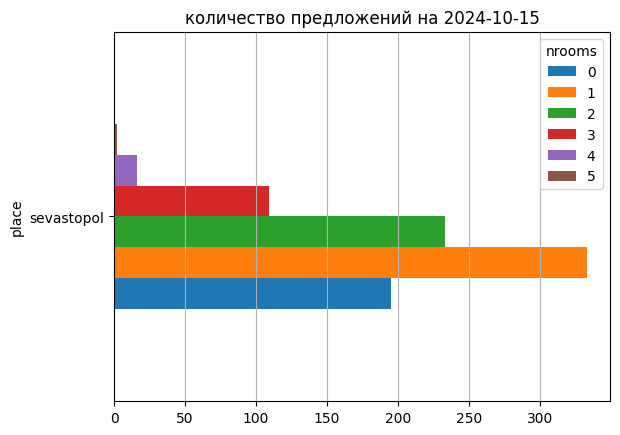

In [37]:
(
gdf_last
.drop_duplicates('url')
.groupby(['nrooms','place'])['url'].count().reset_index()
.pivot(index='place', columns='nrooms', values='url')
.plot.barh(title='количество предложений на '+ str(dt_now))
.grid(axis='x')    
)

In [38]:
(
    gdf_last
    .drop_duplicates('url')
    .groupby(['place','nrooms'])
    ['priceK'].describe(percentiles=percentiles)
)

count  mean   std   min    1%    5%   10%   25%   50%  \
place      nrooms                                                          
sevastopol 0      195.00 25.12 10.56  7.00 12.94 15.00 15.00 18.00 22.00   
           1      333.00 25.64  9.20  9.00 10.00 15.00 16.00 20.00 25.00   
           2      233.00 33.86 15.38 15.00 15.32 20.00 22.00 25.00 30.00   
           3      109.00 54.37 32.33  7.50 25.00 27.40 30.00 35.00 45.00   
           4       16.00 62.81 27.75  7.90 10.92 22.98 31.50 47.50 57.50   
           5        2.00 75.00 21.21 60.00 60.30 61.50 63.00 67.50 75.00   

                    75%    90%    95%    max  
place      nrooms                             
sevastopol 0      29.95  40.00  46.50  70.00  
           1      30.00  35.00  40.00 120.00  
           2      40.00  50.00  61.20 110.00  
           3      60.00 110.00 120.00 190.00  
           4      86.00  95.00 100.00 100.00  
           5      82.50  87.00  88.50  90.00

In [39]:
q_95 = gdf_last.groupby(['place'])['priceK'].quantile(.95)
# q_95

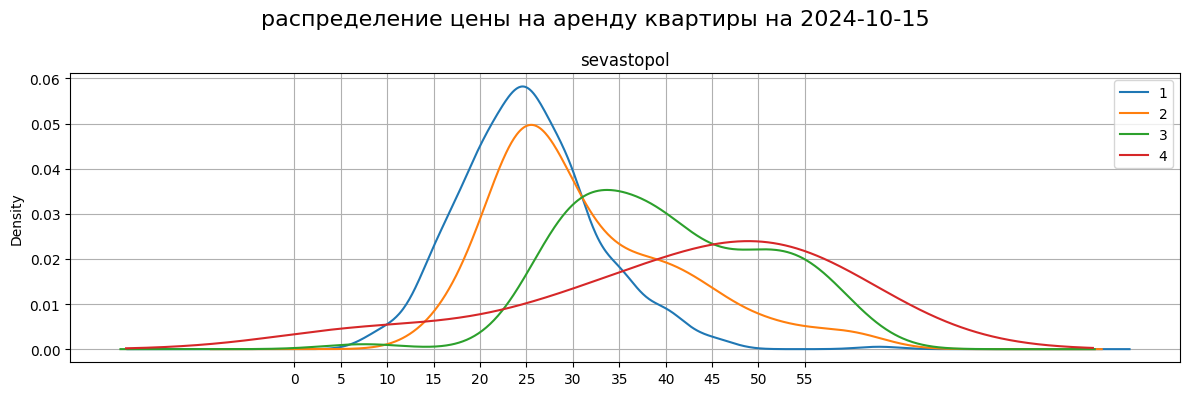

In [47]:
place = 'sevastopol'
fig, ax = plt.subplots(figsize=(12,4))
(
    gdf_last
    .drop_duplicates('url')
    .query(f' (place=="{place}") & (priceK<{q_95[place]}) & (0<nrooms<5) ')
    .groupby(['nrooms'],observed=True)
    ['priceK']
    .plot.kde(legend=True,ax=ax,title=f'{place}', grid=True)   
)
ax.set_xticks( np.arange(0, 60, step=5) )
fig.suptitle(f'распределение цены на аренду квартиры на '+ str( gdf_last['dt'].max() ), fontsize=16)
fig.tight_layout()

# цены на карте

In [48]:
import h3
from shapely.geometry import Polygon
from shapely.geometry import MultiPoint

In [49]:
def cover_grid_hexagonal(gmtr,cell_size=6,crs='EPSG:4326'):
    polygonise = lambda hex_id: Polygon( h3.h3_to_geo_boundary( hex_id, geo_json=True)  )
    hexs = list(h3.polyfill( gmtr.__geo_interface__, cell_size, geo_json_conformant = True ))
    return gpd.GeoDataFrame({ 'hex_id': hexs,  'geometry': list(map(polygonise, hexs)), },crs=crs,)

## Севастополь

In [50]:
frame_sevastopol = gpd.GeoDataFrame([{ # все предложения
            'place':'sevastopol', 
            'geometry':MultiPoint( gdf_last.query('place=="sevastopol"')['geometry'].tolist() ).convex_hull, 
        }],crs='EPSG:4326')

# frame_sevastopol.explore()

In [56]:
grid = cover_grid_hexagonal( frame_sevastopol.geometry.values[0],cell_size=8 )

In [57]:
# gdf_last.columns #[['']]

In [58]:
# df.columns

In [67]:
q_sev = gdf_last.groupby(['place'])['priceK'].quantile(.85)['sevastopol']
display( q_sev )

42.94999999999993

In [70]:
# медиана цены за квадратный метр (тыс.руб.)

grid_values = ( 
    grid
    .sjoin( 
        gdf_last
        .drop_duplicates('url')
        .query(f'(place=="sevastopol")&(0<nrooms<4) & (priceK<{q_sev})')
        , how='inner',)
    .groupby(['hex_id'])
    ['priceK']
    .median()
    .reset_index()
)
grid.merge(grid_values,on='hex_id').explore('priceK',cmap='rainbow') #'area_name', legend=True)

# районы Севастополя

In [71]:
# загружаем области поиска
frames_path = 'data/frames/'
frames_index = pd.read_csv(f'{frames_path}/_index.tsv',sep='\t')

swap_coo = lambda coo : [ (c[1],c[0]) for c in coo ]
df2poly = lambda df : Polygon(swap_coo(df.values))

frames = gpd.GeoDataFrame([ 
        { 'area_name':nm, 'geometry': df2poly( pd.read_csv(f'{frames_path}/{f}',header=None) ) } 
        for nm,f in frames_index.values
    ],crs='epsg:4326',)

# display(frames)

In [72]:
display(frames[['area_name']])

,area_name
0,"Севастополь, район Острякова"
1,"Севастополь, парк 60-летия СССР"
2,"Севастополь, Хрусталёва/Хрюкина"
3,"Севастополь, Геловани/Коломийца"
4,"Севастополь, Музыки/Бирюзова"
5,"Севастополь, кр.горка (старый)"
6,"Севастополь, кр.горка (новый)"
7,"Севастополь, Малахов курган"
8,"Севастополь, Благополучный"


In [73]:
frames.explore('area_name', legend=True)

In [74]:
area_name=[
# 'Севастополь, парк 60-летия СССР',
#'Севастополь, Хрусталёва/Хрюкина',
# 'Севастополь, район Острякова',
#'Севастополь, Малахов курган',
'Севастополь, Геловани/Коломийца',
]

In [75]:
# выбираем область
frame_ = frames[frames['area_name'].isin(area_name)]

In [76]:
# фильтруем данные по области
gdf_last_local = gdf_last.drop_duplicates('url').sjoin( frame_, how='inner', predicate='within') 
gdf_last_local[['title','priceK','address','geometry']].explore( legend=False)

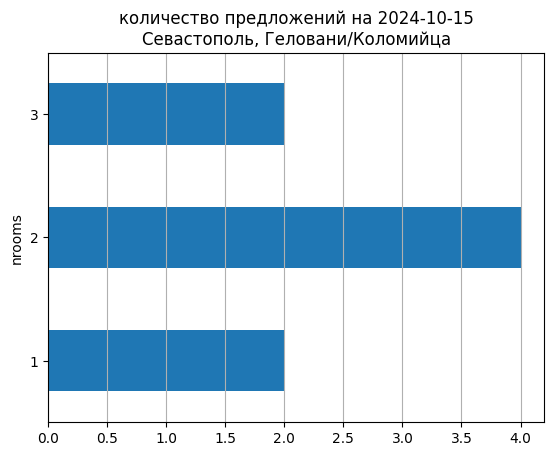

In [77]:
(
    gdf_last_local
    .drop_duplicates('url')
    .groupby(['nrooms'])['url'].count()
    .plot.barh(title='количество предложений на '+ str( dt_now ) + '\n' + ' / '.join(area_name) )
    .grid(axis='x')   
)

In [91]:
# gdf_last_local

In [90]:
gdf_last_local.groupby(['nrooms'],observed=True)['priceK'].describe(percentiles=percentiles)

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,max
nrooms,,,,,,,,,,,,
1,2.00,21.00,5.66,17.00,17.08,17.40,17.80,19.00,21.00,23.00,24.20,25.00
2,4.00,42.50,20.21,25.00,25.15,25.75,26.50,28.75,37.50,51.25,62.50,70.00
3,2.00,42.50,3.54,40.00,40.05,40.25,40.50,41.25,42.50,43.75,44.50,45.00


In [88]:
# q_95 = gdf_last_local['priceM'].quantile(.95)

# fig, ax = plt.subplots(figsize=(7,3) )
# (
#     gdf_last_local
#      .query(f'(priceM<{q_95})')
#     .drop_duplicates('url')
#     .groupby(['nrooms'],observed=True)
#     ['priceK'].plot.kde(legend=True,ax=ax,title='/'.join(area_name), grid=True)   
# )

# ax.set_xticks( np.arange(15, 60, step=2) )

# fig.suptitle(f'распределение цены на квартиры на '+ str( dt_now ), fontsize=16)
# fig.tight_layout()

----

In [85]:
# # изменение цены по району
# gdf_local = gdf.sjoin( frame_, how='inner', predicate='within') 

In [86]:
# percentiles=[.01,.05,.1,.25,.5,.75,.9]
# # stat = gdf_local.groupby(['nrooms','month'],observed=True)['priceM'].describe(percentiles=percentiles)
# stat = gdf_local.groupby(['nrooms','week'],observed=True)['priceK'].describe(percentiles=percentiles)
# # display( stat )

In [ ]:
# fig, ax = plt.subplots(1,len(sizes),figsize=(17,6), sharey=True )

# for i,s in enumerate(sizes): 
#     stat.loc[(s),cols].plot(title=f'цена {s}к', grid=True,ax=ax[i],legend=False, rot=70, style='.-' )   
#     ax[i].set_yticks( np.arange(3, 12, step=1) )

# fig.suptitle(f'изменение цены на квартиры\n {'/'.join(area_name)}', fontsize=16)
# fig.legend( labels=cols,frameon=True, ncol=len(cols), bbox_to_anchor=(0.6, 0.01))    
# fig.tight_layout()

In [87]:
# fig, ax = plt.subplots(1,len(sizes),figsize=(12,5), sharey=True )

# for i,s in enumerate(sizes): 
#     stat.loc[(s),'count'].plot(title=f'предложений {s}к', grid=True,ax=ax[i],legend=False, rot=70, style='.-' )   

# fig.suptitle(f'изменение количества предложений на квартиры\n {'/'.join(area_name)}', fontsize=16)

# fig.legend( labels=cols,frameon=True, ncol=len(cols), bbox_to_anchor=(0.6, 0.01))    
# fig.tight_layout()